In [23]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('science')
plt.style.use('classic')
import seaborn as sns
import networkx as net
#from bokeh.io import output_notebook, show, save
#plt.rc('text',usetex=True)

cont = 0

In [19]:
print(os.getcwd())
print(os.listdir())

/Users/barbem4/Desktop/Vandy/Bioinformatics/Second project
['distribution plot with power law.png', 'distribution plot.png', '.DS_Store', 'PP-Pathways_ppi.xlsx', 'First graph.png', 'PP-Pathways_ppi.csv', 'Net analysis.ipynb', 'PP-Pathways_ppi.txt']


In [20]:
df = pd.read_csv('PP-Pathways_ppi.csv')
df


,1394,2778
0,6331,17999
1,122704,54460
2,2597,2911
3,4790,79155
4,6146,101929876
...,...,...
342347,10969,4670
342348,6774,55748
342349,23299,399693
342350,9247,337967


In [4]:
edges = [(t,v) for t,v in df.values]

In [5]:
#Build the graph
G = net.Graph()

In [6]:
G.add_edges_from(edges)

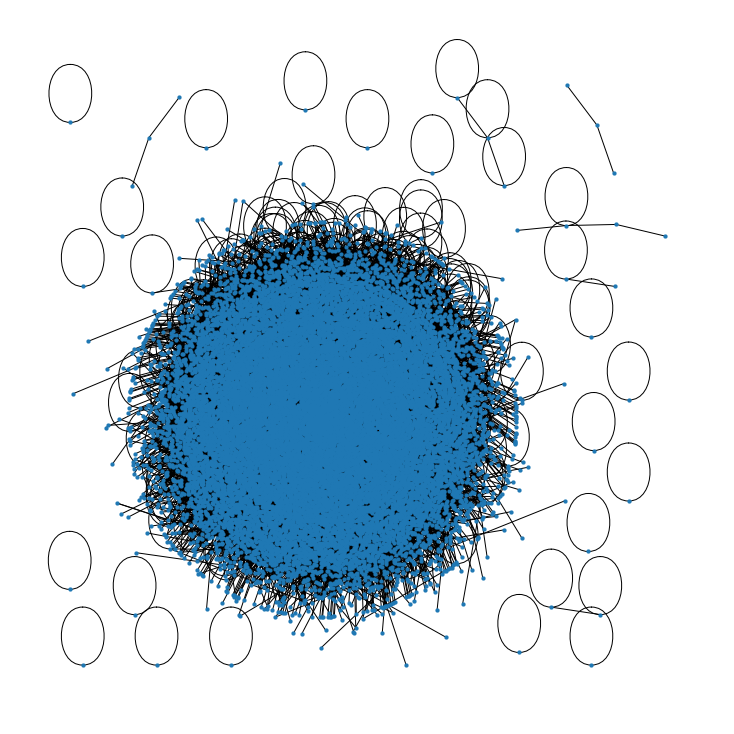

In [7]:
###########################
####Network plotting###########
###TAKES LONG TO PLOT######
###########################

STOP = input('Do you really want to rerun the network graph? (y/n)')


if STOP =='y':
    plt.figure(figsize = (10,10))
    net.draw(G, pos = net.nx_pydot.graphviz_layout(G),node_size = 16,linewidths = 0.2)
    plt.savefig(os.getcwd()+'/First graph.png')
else:
    print('Graph not rerun')



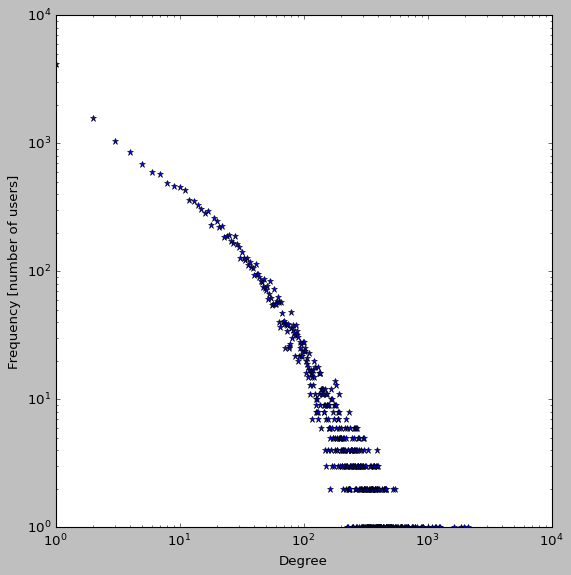

In [24]:
degree_freq = net.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(8,8)) 
plt.loglog(degrees, degree_freq,'*') 
plt.xlabel('Degree',fontsize = 12)
plt.ylabel('Frequency [number of users]', fontsize = 12)


plt.savefig(os.getcwd()+'/distribution plot.png')


In [25]:
def powerfit(x, y):
    """line fitting on log-log scale"""
    k, m = np.polyfit(np.log10(x), np.log10(y), 1)
    return 10**m * x**(k),k

gamma= -1.55


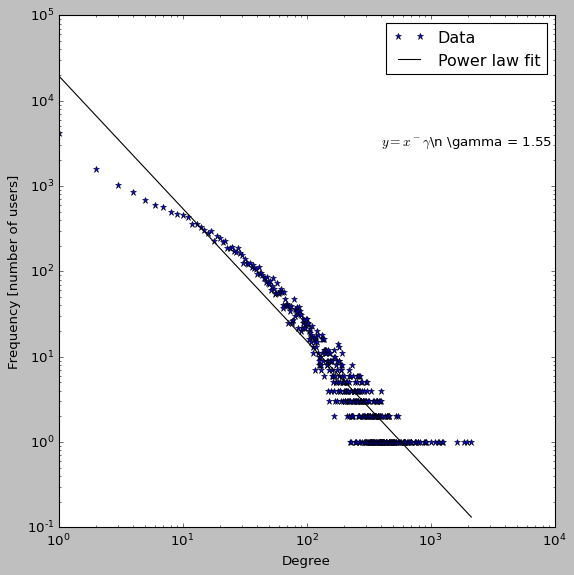

In [26]:
#Fit a power law to the data and get gamma coefficient


degree_freq = net.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(8,8)) 
plt.loglog(degrees, degree_freq,'*') 
plt.xlabel('Degree',fontsize = 12)
plt.ylabel('Frequency [number of users]', fontsize = 12)

#Remove where degree freq is zero
idxs = np.where(np.array(degree_freq) != 0)[0]
degree_freq = list(map(degree_freq.__getitem__, idxs))
degrees = list(map(degrees.__getitem__, idxs))

ys,gamma = powerfit(degrees, degree_freq)

plt.plot(degrees,ys,color='black')
plt.legend(['Data','Power law fit'])
plt.text(400,3000,r'$y = x^-\gamma$\n \gamma = {}'.format(np.round(abs(gamma), decimals = 2)))

print('gamma=',np.round(gamma, decimals = 2))



plt.savefig(os.getcwd()+'/distribution plot with power law.png')